# SCD metainfo_c4scd.csv 

In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
BILICOUGH_ROOT = "G:/DATAS-Medical/BILIBILICOUGH/"
metadf = pd.read_csv(BILICOUGH_ROOT + "bilicough_metainfo_c4scd_250307_dura.csv", delimiter=',', header=0, index_col=0,
                             usecols=[0, 1, 2, 3, 5], encoding="ansi")
pre_sr, pre_en = None, None
cur_st, cur_en = None, None
for ind, item in enumerate(metadf.itertuples()):
    print(item[1], item[2], item[3], item[4])
    if cur_st is None:
        cur_st, cur_en = item[2], item[3]

bilicough_000 00:01.7 00:02.2 0
bilicough_000 00:02.2 00:02.7 0
bilicough_000 00:03.0 00:03.4 0
bilicough_000 00:03.4 00:04.0 0
bilicough_000 00:04.0 00:04.5 0
bilicough_000 00:04.5 00:05.3 0
bilicough_000 00:05.3 00:06.0 0
bilicough_000 00:06.0 00:06.4 0
bilicough_000 00:06.4 00:07.3 0
bilicough_000 00:07.3 00:07.8 0
bilicough_000 00:07.8 00:08.3 0
bilicough_000 01:09.6 01:09.9 0
bilicough_000 01:09.9 01:10.3 0
bilicough_000 01:10.3 01:10.8 0
bilicough_000 01:10.8 01:11.2 0
bilicough_000 01:11.2 01:11.4 0
bilicough_000 01:11.6 01:11.9 0
bilicough_000 01:12.5 01:12.9 0
bilicough_000 01:12.9 01:13.3 0
bilicough_000 01:13.3 01:13.6 0
bilicough_000 01:13.6 01:13.9 0
bilicough_000 01:13.9 01:14.6 0
bilicough_000 01:14.6 01:15.0 0
bilicough_000 01:15.0 01:15.3 0
bilicough_000 01:15.5 01:15.8 0
bilicough_000 01:15.8 01:16.4 0
bilicough_000 01:16.4 01:16.9 0
bilicough_000 01:16.9 01:17.3 0
bilicough_000 01:17.3 01:17.6 0
bilicough_000 01:17.8 01:18.1 0
bilicough_000 01:18.1 01:18.8 0
bilicoug

In [ ]:
metadf = pd.read_csv(BILICOUGH_ROOT+"bilicough_metainfo_c4scd_250303.csv", delimiter=',', header=0, index_col=None, usecols=[0,1,2,5], encoding="ansi")
def min2sec(t: str) -> float:
    """将"MM:ss.ss"格式的时间字符串转换为总秒数（浮点数）。"""
    minutes_str, seconds_str = t.split(':')
    minutes = int(minutes_str)
    seconds = float(seconds_str)
    return minutes * 60 + seconds

def sec2min(f: float) -> str:
    """将总秒数（浮点数）转换为"MM:ss.ss"格式的时间字符串，支持负数。"""
    sign = -1 if f < 0 else 1
    f_abs = abs(f)
    minutes = int(f_abs // 60)
    seconds = f_abs % 60
    # 四舍五入到两位小数并处理进位
    seconds_rounded = round(seconds, 2)
    if seconds_rounded >= 60:
        minutes += 1
        seconds_rounded -= 60
    # 格式化为两位整数分钟和两位整数+两位小数秒
    minutes_str = f"{minutes:02d}"
    seconds_str = f"{seconds_rounded:05.2f}"  # 例如 5.5 → 05.50
    time_str = f"{minutes_str}:{seconds_str}"
    return f"-{time_str}" if sign < 0 else time_str

def subtract(t1: str, t2: str) -> str:
    """计算两个时间字符串的差值，返回"MM:ss.ss"格式的结果。"""
    diff = min2sec(t1) - min2sec(t2)
    return sec2min(diff)
    

In [12]:
# 测试用例
if __name__ == "__main__":
    # 测试 min2sec
    assert min2sec("01:30.45") == 90.45
    assert min2sec("00:05.50") == 5.50
    assert min2sec("02:00.00") == 120.00

    # 测试 sec2min
    assert sec2min(90.45) == "01:30.45"
    assert sec2min(5.5) == "00:05.50"
    assert sec2min(60.0) == "01:00.00"
    # assert sec2min(60.995) == "01:01.00"  # 四舍五入进位
    assert sec2min(-5.5) == "-00:05.50"

    # 测试 subtract
    assert subtract("01:30.45", "00:45.20") == "00:45.25"
    assert subtract("00:05.50", "00:10.30") == "-00:04.80"
    assert subtract("02:00.00", "01:00.00") == "01:00.00"
    print("所有测试通过！")
m1, m2 = "01:18.07", "01:19.08"
print(subtract(m2, m1))
sec2min(60.995)

所有测试通过！
00:01.01


'01:00.99'

## 在metadf里面添加duration的信息

In [37]:
duration = []
duration_sec = []
metadf = pd.read_csv(BILICOUGH_ROOT+"bilicough_metainfo_c4scd_250303.csv", delimiter=',', header=0, index_col=None, usecols=[0,1,2,3,4, 5, 6], encoding="ansi")
for ind, item in enumerate(metadf.itertuples()):
    # label = int(item[5])
    # if label not in [0, 1, 2, 3]:
    #     continue
    # print(item[2], item[3])
    diff = min2sec(item[3]) - min2sec(item[2])
    duration.append(sec2min(diff))
    duration_sec.append(diff)
metadf["dura_min"] = duration
metadf["dura_sec"] = duration_sec

In [42]:
metadf.to_csv(BILICOUGH_ROOT+"bilicough_metainfo_c4scd_250307_dura.csv", sep=',')

In [29]:
import pandas as pd

# 创建示例数据
# data = {
#     'label1': ['A', 'B', 'A', 'C', 'B', 'A', 'D', None, 'C', 'A'],
#     'label2': [0, 1, 0, 1, 2, 0, 1, 2, None, 0],
#     'value': [1.2, 2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9, 9.0, 10.1]
# }
# df = pd.DataFrame(data)

# 指定类别型列（自动识别或手动指定）
category_cols = ['d_label', 'e_label']

# # 方法1：使用 value_counts()（推荐）
# counts_dict = {}
# for col in category_cols:
#     counts = metadf[col].value_counts(dropna=False)  # 包含缺失值统计
#     counts_dict[col] = counts

# # 将结果合并为 DataFrame
# result_df = pd.concat(counts_dict.values(), axis=1, keys=counts_dict.keys())
# result_df = result_df.fillna(0).astype(int)  # 转换为整数并填充0

# 方法2：使用 groupby（等效）
grouped_dict = {}
for col in category_cols:
    grouped = metadf.groupby(col, dropna=False).size().rename('count')
    grouped_dict[col] = grouped
result_df = pd.concat(grouped_dict.values(), axis=1, keys=grouped_dict.keys())
result_df = result_df.fillna(0).astype(int)  # 转换为整数并填充0


print("统计结果：")
print(result_df)

统计结果：
    d_label  e_label
0       538       49
1       233      624
2       142      101
3       152       62
4         4      102
5         0       51
6         0       33
7         0       10
8         0       15
9         0       12
10        0       10


In [39]:
metadf.groupby('d_label')['dura_sec'].sum()

d_label
0    612.4
1    302.4
2    170.4
3    226.1
4     11.2
Name: dura_sec, dtype: float64

In [40]:
metadf.groupby('e_label')['dura_sec'].sum()

e_label
0     102.8
1     638.5
2     105.3
3      65.2
4      97.5
5     206.0
6      53.0
7      21.2
8      12.1
9      10.5
10     10.4
Name: dura_sec, dtype: float64

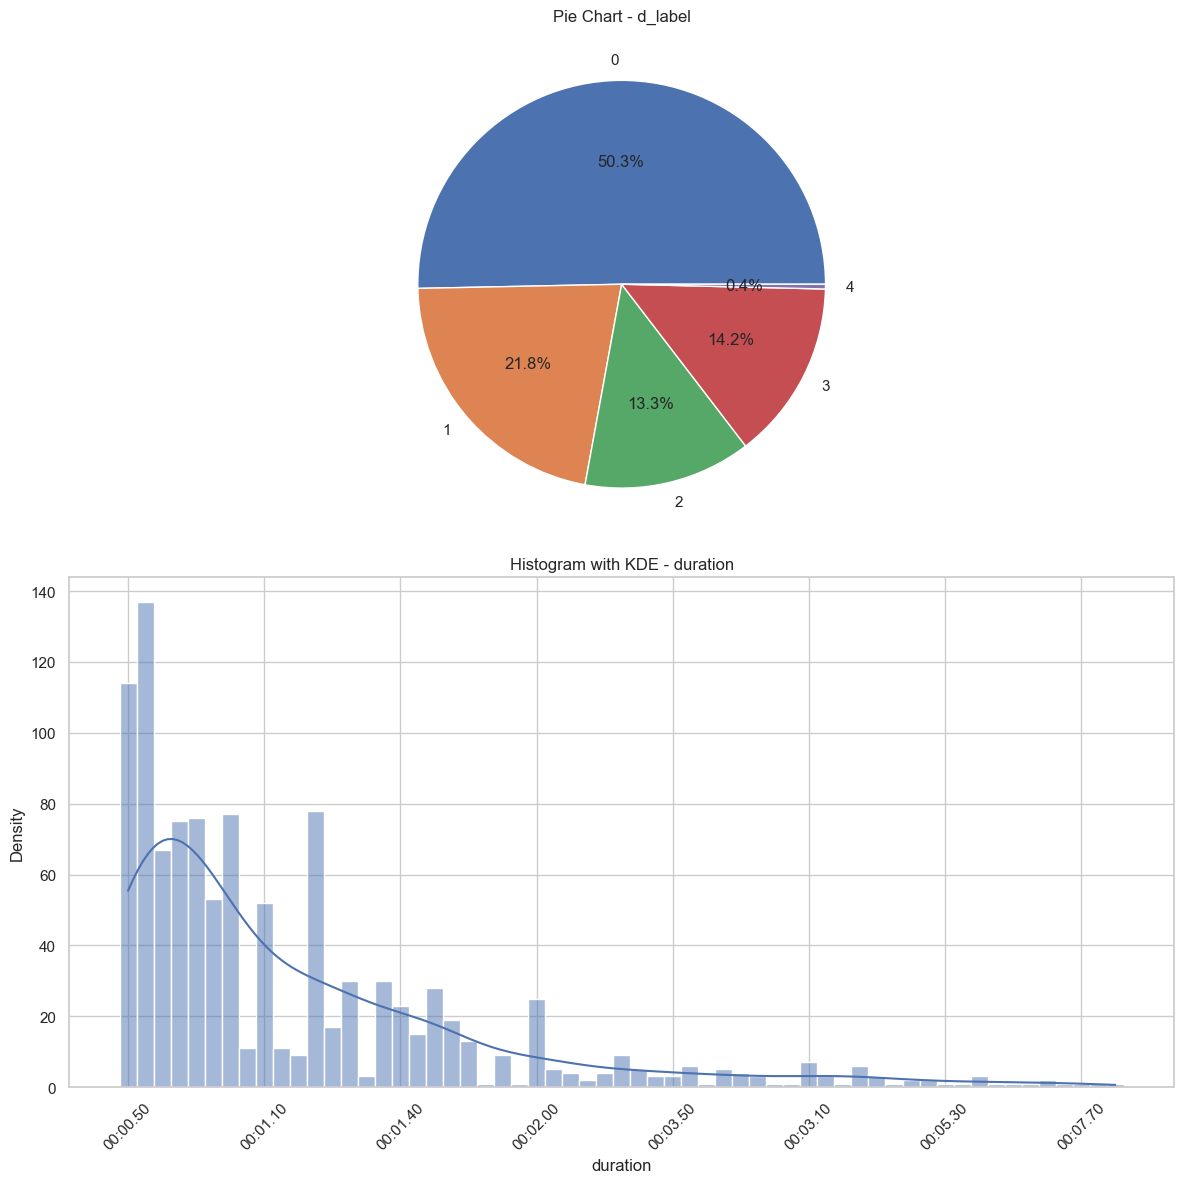

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from typing import List, Optional

def plot_dataframe(
    df: pd.DataFrame,
    categorical_cols: Optional[List[str]] = None,
    continuous_cols: Optional[List[str]] = None,
    max_categories: int = 10,
    bins: int = 20,
    max_ticks: int = 10,   # 新增：控制横轴最大标签数
    rotate_degree: int = 45,  # 新增：标签旋转角度
    figsize: tuple = (12, 6),
    save_path: Optional[str] = None
):
    """
    自动生成统计图表：
    - 类别型列：柱状图（类别数≤max_categories时）或 饼图（类别数≤5时）
    - 连续型列：直方图 + KDE 曲线
    
    参数:
        df (pd.DataFrame): 输入数据
        categorical_cols (List[str]): 指定类别型列名列表（默认自动识别）
        continuous_cols (List[str]): 指定连续型列名列表（默认自动识别）
        max_categories (int): 类别型列显示的最大类别数（超出则合并为"其他"）
        bins (int): 连续型列直方图的分箱数
        figsize (tuple): 图表基础尺寸
        save_path (str): 保存图表的路径（None则显示图表）
    """
    # 自动识别列类型（如果未指定）
    if categorical_cols is None:
        categorical_cols = [
            col for col in df.columns 
            if (df[col].dtype in ['object', 'category']) or 
               (df[col].nunique() <= max_categories and df[col].dtype in ['int', 'int64'])
        ]
    if continuous_cols is None:
        continuous_cols = [col for col in df.columns 
                          if col not in categorical_cols and df[col].dtype in ['int64', 'float64']]

    # 创建画布
    plt.figure(figsize=(figsize[0], figsize[1] * (len(categorical_cols + continuous_cols))))
    sns.set(style="whitegrid")

    # 绘制类别型列
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(len(categorical_cols + continuous_cols), 1, i)
        counts = df[col].value_counts().sort_index()
        
        # 合并小类别
        if len(counts) > max_categories:
            counts = counts[:max_categories]
            counts["其他"] = df[col].value_counts()[max_categories:].sum()
        
        # 选择图表类型
        if len(counts) <= 5:
            plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
            plt.title(f'Pie Chart - {col}')
        else:
            sns.barplot(x=counts.index.astype(str), y=counts.values)
            plt.xticks(rotation=45)
            plt.title(f'Bar Plot - {col}')
            plt.ylabel('Count')

    # 绘制连续型列
    for i, col in enumerate(continuous_cols, len(categorical_cols)+1):
        plt.subplot(len(categorical_cols + continuous_cols), 1, i)
        ax = sns.histplot(data=df, x=col, kde=True, bins=bins)
        
        # 优化横轴标签显示
        ax.xaxis.set_major_locator(MaxNLocator(nbins=max_ticks))  # 限制标签数量
        plt.xticks(rotation=rotate_degree)  # 旋转标签
        plt.title(f'Histogram with KDE - {col}')
        plt.xlabel(col)
        plt.ylabel('Density')

    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()

# # =====================
# # 测试示例
# # =====================
# if __name__ == "__main__":
#     # 创建测试数据
#     df = pd.DataFrame({
#         'label': [0, 1, 2, 0, 1, 2, 0, 1, 2, 3],
#         'duration': [12.3, 15.7, 13.2, 14.5, 16.1, 17.8, 11.9, 10.5, 9.8, 8.7],
#         'category': ['A', 'B', 'A', 'C', 'B', 'A', 'D', 'E', 'F', 'G'],
#         'value': [1.2, 2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9, 9.0, 10.1]
#     })

# 生成图表（保存到当前目录）
plot_dataframe(
    metadf,
    categorical_cols=['d_label'],
    continuous_cols=['duration'],
    save_path="statistics_plots.png"
)

# End

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
from tqdm import tqdm
import seaborn
import torch
import torch.nn as nn
BILICOUGH_ROOT = "G:/DATAS-Medical/BILIBILICOUGH/"

# 从mp4中提取wav音频

In [ ]:
names = ["金_属_音_咳_嗽","剧烈的咳嗽。","女孩感冒哮喘发作","四个常见咳嗽声音最后一个要重视_听一下你属于哪一种","我咳嗽的样子", "小朋友哮喘发作（看着好痛苦）"]
for name in names:
    filename = BILICOUGH_ROOT + name + ".mp4"
    outname = BILICOUGH_ROOT + name + ".wav"
    os.system("ffmpeg -i {} -f wav -ar 44100 {}".format(filename, outname))

In [ ]:
file_list = []
for item in os.listdir(BILICOUGH_ROOT):
    if item[-3:] == "ass":
        file_list.append(item)
name_mapper = open(BILICOUGH_ROOT + "filename2index.txt", 'w')
for idx, item in enumerate(file_list):
    print(BILICOUGH_ROOT+item)
    name_mapper.write("bilicough_{},".format(("00"+str(idx))[-3:])+item[:-4]+"\n")
name_mapper.close()

# 读取整个音频并标注其咳嗽段

In [ ]:
wavfin = open(BILICOUGH_ROOT + "filename2index.txt", 'r')
name_list = []
wavfin.readline()
line = wavfin.readline()
while line:
    name_list.append(line.strip())
    line = wavfin.readline()
print(name_list)

In [ ]:
def min2sec(t: str):
    parts = t.split(':')
    res = float(parts[-1])
    f = 60
    for i in range(len(parts)-1):
        res += int(parts[len(parts)-2-i]) * f
        f *= 60
    return res

def wav_plot(wavfile, label_list, idx=0):
    y, sr = librosa.load(BILICOUGH_ROOT + wavfile)
    print("sample rate:", sr)
    y_plt = np.array([])
    for item in label_list:
        st, en = int(min2sec(item[0])*sr), int(min2sec(item[1])*sr+1)
        print("st, en:", st, en)
        seg = y[st: en]
        y_plt = np.concatenate((y_plt, seg, np.zeros(8000)), axis=0)
    plt.figure(idx)
    plt.plot(y_plt)

In [ ]:
idx = 17
wavtest = name_list[idx] + ".wav"
asstest = name_list[idx] + ".ass"
print(wavtest, asstest)
assfin = open(BILICOUGH_ROOT + asstest, 'r', encoding="utf-8")
label_list = []
line = assfin.readline()
while line.strip()!="[Events]":
    line = assfin.readline()
    # print(line)
assfin.readline()
line = assfin.readline()
while line:
    # print(line)
    parts = line.split(',')
    if parts[9].strip() == "useless":
        pass
    else:
        label_list.append([parts[1], parts[2], parts[9].strip()])
    line = assfin.readline()
for item in label_list:
    print(item)
wav_plot(wavtest, label_list, idx)

### 批量绘图

In [ ]:
for idx, name in enumerate(name_list):
    wavtest = name_list[idx] + ".wav"
    asstest = name_list[idx] + ".ass"

    assfin = open(BILICOUGH_ROOT + asstest, 'r', encoding="utf-8")
    label_list = []
    line = assfin.readline()
    while line.strip()!="[Events]":
        line = assfin.readline()
        # print(line)
    assfin.readline()
    line = assfin.readline()
    while line:
        # print(line)
        parts = line.split(',')
        if parts[9].strip() == "useless":
            pass
        else:
            label_list.append([parts[1], parts[2], parts[9].strip()])
        line = assfin.readline()
    for item in label_list:
        print(item)
    
    wav_plot(wavtest, label_list, idx)

# 二分类及其标注
- 非咳嗽的标注：0，"useless", "silence", "noise"
- 咳嗽的标注：1，其他都是

### 第一步，读取所有的ass文件
- 查看标签有哪些，来自哪些文件
- 查看标签的个数
- 查看时长分布

In [ ]:
wavfin = open("G:/DATAS-Medical/BILIBILICOUGH/filename2index.txt", 'r')
name_list = []
wavfin.readline()
line = wavfin.readline()
while line:
    name_list.append(line.strip())
    line = wavfin.readline()
print(name_list)

### 注意！此处有重要文件“bilicough_metainfo.csv”的创建和写入

In [ ]:
print(name_list)
label_dict = dict()
label_names = ["breathe", "cough","clearthroat","exhale", "hum", "inhale","noise", "silence", "sniff","speech", "vomit","whooping"]
label_cnt = dict()
name2label = {"breathe":0, "cough":2,"clearthroat":1,"exhale":3, "hum":4, "inhale":5,"noise":6, "silence":7, "sniff":8,"speech":9, "vomit":10,"whooping":11}
# metainfo_file = open("G:/DATAS-Medical/BILIBILICOUGH/bilicough_metainfo.csv", 'w')
# metainfo_file.write("filename,st,en,labelfull,labelname,label\n")
for idx, name in enumerate(name_list):
    wavtest = name_list[idx] + ".wav"
    asstest = name_list[idx] + ".ass"
    assfin = open("G:/DATAS-Medical/BILIBILICOUGH/" + asstest, 'r', encoding="utf-8")
    label_list = []
    line = assfin.readline()
    while line.strip()!="[Events]":
        line = assfin.readline()
        # print(line)
    assfin.readline()
    line = assfin.readline()
    while line:
        # print(line)
        parts = line.split(',')
        lab_tmp = parts[9].strip()
        if lab_tmp == "useless":
            pass
        # if lab_tmp == "clearingthroat":
        #     print(name_list[idx])
        else:
            label_list.append([parts[1], parts[2], lab_tmp])
            if lab_tmp not in label_dict:
                label_dict[lab_tmp] = 1
            else:
                label_dict[lab_tmp] = label_dict.get(lab_tmp)+1
            
            label = None
            if lab_tmp[:3] == "hum":
                label = lab_tmp[:3]
            elif lab_tmp[:5] in ["cough", "noise", "sniff", "vomit"]:
                label = lab_tmp[:5]
            elif lab_tmp[:6] in ["inhale", "exhale", "speech"]:
                label = lab_tmp[:6]
            elif lab_tmp[:7] in ["breathe","silence"]:
                label = lab_tmp[:7]
            elif lab_tmp[:8] in ["whooping"]:
                label = lab_tmp[:8]
            elif lab_tmp[:11] in ["clearthroat"]:
                label = lab_tmp[:11]
            else:
                print(lab_tmp, name_list[idx])
                raise Exception("Unknown Class.")
                
            if label not in label_cnt:
                label_cnt[label] = 1
            else:
                label_cnt[label] = label_cnt.get(label)+1
            # metainfo_file.write("{},{},{},{},{},{}\n".format(name_list[idx], parts[1], parts[2] ,lab_tmp, label,name2label[label]))
        line = assfin.readline()
# metainfo_file.close()
# for item in label_list:
#     print(item)
print("标签分布：")
for k,v in label_dict.items():
    print("key:{},\tcount:{}".format(k,v))
print("---------------=============----------------")
for k,v in label_cnt.items():
    print("key:{},\tcount:{}".format(k,v))


## 读取metainfo文件，创建不同任务的标注

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

In [ ]:
metadf = pd.read_csv("G:/DATAS-Medical/BILIBILICOUGH/bilicough_metainfo.csv", delimiter=',', header=0, index_col=None, encoding="ansi")
print(metadf)
newdf = metadf
newdf["binlab"] = newdf["label"].apply(lambda x:2 if x==2 else 0)
newdf

In [ ]:
def min2sec(t: str):
    parts = t.split(':')
    res = float(parts[-1])
    f = 60
    for i in range(len(parts)-1):
        res += int(parts[len(parts)-2-i]) * f
        f *= 60
    return res


In [ ]:
sn_list = []
sr = 22050
for ind, item in enumerate(metadf.itertuples()):
    # print("key:{},\tcount:{}, st:{}, en:{}, {}, {}".format(ind, item[1], item[2], item[3], item[5], item[6]))
    if item[6] == 2:
        st, en = int(min2sec(item[2])*sr), int(min2sec(item[3])*sr+1)
        sn = en - st
        sn_list.append((en - st)/22050)

# plt.hist(sn_list, bins=12)

trs = [0.3, 0.5, 0.8, 1.0, 1.2, 1.5, 1.7, 2.0, 2.5, 10]
cnt_list = [0] * len(trs)
for sn in sn_list:
    for i in range(len(trs)):
        if sn < trs[i]+0.1:
            cnt_list[i] += 1
            break
plt.figure(0)
plt.bar([str(item) for item in trs], cnt_list, width=0.2)

# 通过滑动窗口截取数据片段
## 在所有数据中获取有效片段和无效片段

In [ ]:
import pandas as pd
import librosa
# newdf.groupby("binlab").count()
def min2sec(t: str):
    parts = t.split(':')
    res = float(parts[-1])
    f = 60
    for i in range(len(parts)-1):
        res += int(parts[len(parts)-2-i]) * f
        f *= 60
    return res

def get_bilicough_dataset():
    ROOT = "G:/DATAS-Medical/BILIBILICOUGH/"
    metadf = pd.read_csv(ROOT+"bilicough_metainfo.csv", delimiter=',', header=0, index_col=None, usecols=[0,1,2,5], encoding="ansi")
    print(metadf)
    cur_fname = None
    cur_wav = None
    data_length = None
    sample_list = []
    label_list = []
    sr_list = []
    pre_st, pre_en = None, None
    # filename	st	en	labelfull	labelname	label	binlab
    for ind, item in enumerate(metadf.itertuples()):
        if (cur_fname != item[1]) or (cur_fname is None):
            cur_fname = item[1]
            cur_wav, sr = librosa.load(ROOT+cur_fname+".wav")
            if sr not in sr_list:
                sr_list.append(sr)
            data_length = sr
        st, en = int(min2sec(item[2])*sr), int(min2sec(item[3])*sr+1)
        if en > len(cur_wav):
            en = len(cur_wav)
        if en - st < 100:
            raise Exception("Error Index.")
        sn = en - st
        # sec = (en - st)/22050
        if (pre_en is None):
            if st >= data_length:
                st_pos = 0
                ind = 0
                while st_pos + data_length <= st:
                    # if len(cur_wav[st_pos:st_pos+data_length]) != sr:
                    #     raise Exception("Error Length.")
                    sample_list.append(cur_wav[st_pos:st_pos+data_length])
                    label_list.append(0)
                    st_pos += data_length
                    ind += 1
                    if ind >2:
                        break
                sample_list.append(cur_wav[st-data_length:st])
                label_list.append(0)
        else:
            if st - pre_en >= sr:
                st_pos = pre_en
                ind = 0
                while st_pos + data_length <= st:
                    # if len(cur_wav[st_pos:st_pos+data_length]) != sr:
                    #     raise Exception("Error Length.")
                    sample_list.append(cur_wav[st_pos:st_pos+data_length])
                    label_list.append(0)
                    st_pos += data_length
                    ind += 1
                    if ind > 2:
                        break
                sample_list.append(cur_wav[st-data_length:st])
                label_list.append(0)
        label = int(item[4])
        if sn==data_length:
            # if len(cur_wav[st:en]) != sr:
            #     raise Exception("Error Length.")
            sample_list.append(cur_wav[st:en])
            if label in [6, 7]:
                label_list.append(0)
            else:
                label_list.append(1)
        elif sn < data_length:
            new_sample = np.zeros(data_length)
            # print(st, en, sn, len(cur_wav), item[1])
            if en <= len(cur_wav):
                new_sample[:sn] = cur_wav[st:en]
            else:
                new_sample[:sn] = cur_wav[len(cur_wav)-sn:len(cur_wav)]
            # if len(new_sample) != sr:
            #     raise Exception("Error Length.")
            sample_list.append(new_sample)
            if label in [6, 7]:
                label_list.append(0)
            else:
                label_list.append(1)
        else:
            cnt_sum = sn // data_length + 1
            res = cnt_sum * data_length - sn
            overlap = res // (cnt_sum-1)
            st_pos = st
            while st_pos + data_length < en:
                # if len(cur_wav[st_pos:st_pos+data_length]) < data_length: 
                #     tmp_length = len(cur_wav[st_pos:st_pos+data_length])
                #     print(data_length, tmp_length)
                #     # raise Exception("Error Length.")
                #     print("Error Length.")
                #     new_sample = np.zeros(data_length)
                #     new_sample[:tmp_length] = cur_wav[st_pos:st_pos+data_length]
                #     sample_list.append(new_sample)
                # else:
                #     sample_list.append(cur_wav[st_pos:st_pos+data_length])  
                sample_list.append(cur_wav[st_pos:st_pos+data_length])                
                if label in [6, 7]:
                    label_list.append(0)
                else:
                    label_list.append(1)
                st_pos += data_length - overlap
            sample_list.append(cur_wav[en-data_length:en])
            label_list.append(1)
        pre_st, pre_en = st, en
    print("sound count:{}, all count:{}.".format(sum(label_list), len(label_list)))
    print(sr_list)
    return sample_list, label_list

sample_list, label_list = get_bilicough_dataset()
length_list = []
for item in sample_list:
    if len(item) not in length_list:
        length_list.append(len(item))
print(length_list)

## 在另外下载的白噪声数据中截取部分用于充实数据的无效片段

In [ ]:
import os
import librosa

def load_bilinoise_dataset():
    NOISE_ROOT = "G:/DATAS-Medical/BILINOISE/"
    noise_length = None
    filter_length = 25
    ind = 0
    new_noise_list = []
    for item in os.listdir(NOISE_ROOT):
        if item[-4:] == ".wav" and len(item)>=filter_length:
            cur_fname = NOISE_ROOT+item
            cur_wav, sr = librosa.load(cur_fname)
            noise_length = sr
            L = len(cur_wav)
            st_pos = np.random.randint(0, L-noise_length)
            new_noise_list.append(cur_wav[st_pos:st_pos+noise_length])
            # print(NOISE_ROOT+item)
        ind += 1
        if ind > 18:
            break
    for item in new_noise_list:
        print(len(item))

# End